In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

msft = yf.Ticker("AAPL")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="1y")

hist[['Volume'][0]]

Date
2021-11-17 00:00:00-05:00     88807000
2021-11-18 00:00:00-05:00    137827700
2021-11-19 00:00:00-05:00    117305600
2021-11-22 00:00:00-05:00    117467900
2021-11-23 00:00:00-05:00     96041900
                               ...    
2022-11-10 00:00:00-05:00    118854000
2022-11-11 00:00:00-05:00     93903800
2022-11-14 00:00:00-05:00     73374100
2022-11-15 00:00:00-05:00     89868300
2022-11-16 00:00:00-05:00     64170900
Name: Volume, Length: 252, dtype: int64

In [ ]:
hist[["Close", "Volume"]]

,Close,Volume
Date,,
2021-11-17 00:00:00-05:00,152.604340,88807000
2021-11-18 00:00:00-05:00,156.959045,137827700
2021-11-19 00:00:00-05:00,159.623581,117305600
2021-11-22 00:00:00-05:00,160.090881,117467900
2021-11-23 00:00:00-05:00,160.478622,96041900
...,...,...
2022-11-10 00:00:00-05:00,146.869995,118854000
2022-11-11 00:00:00-05:00,149.699997,93903800
2022-11-14 00:00:00-05:00,148.279999,73374100


In [ ]:
# k是某天的成交量
# acc = list(hist[["Volume"]].iloc[:, 0])
# acc

In [ ]:
V0 = hist['Volume'].mean()
data = hist[["Close", "Volume"]]
data

,Close,Volume
Date,,
2021-11-17 00:00:00-05:00,152.604340,88807000
2021-11-18 00:00:00-05:00,156.959045,137827700
2021-11-19 00:00:00-05:00,159.623581,117305600
2021-11-22 00:00:00-05:00,160.090881,117467900
2021-11-23 00:00:00-05:00,160.478622,96041900
...,...,...
2022-11-10 00:00:00-05:00,146.869995,118854000
2022-11-11 00:00:00-05:00,149.699997,93903800
2022-11-14 00:00:00-05:00,148.279999,73374100


In [ ]:
import pandas as pd
df = pd.DataFrame(hist[['Volume'][0]]) #因為是三維(xyz)資料，所以先取出第一張表
df.to_csv('test.csv') # 匯出資料表
df

,Volume
Date,
2021-11-17 00:00:00-05:00,88807000
2021-11-18 00:00:00-05:00,137827700
2021-11-19 00:00:00-05:00,117305600
2021-11-22 00:00:00-05:00,117467900
2021-11-23 00:00:00-05:00,96041900
...,...
2022-11-10 00:00:00-05:00,118854000
2022-11-11 00:00:00-05:00,93903800
2022-11-14 00:00:00-05:00,73374100


In [ ]:
df = pd.read_csv('test.csv')
df

,Date,Volume
0,2021-11-17 00:00:00-05:00,88807000
1,2021-11-18 00:00:00-05:00,137827700
2,2021-11-19 00:00:00-05:00,117305600
3,2021-11-22 00:00:00-05:00,117467900
4,2021-11-23 00:00:00-05:00,96041900
...,...,...
247,2022-11-10 00:00:00-05:00,118854000
248,2022-11-11 00:00:00-05:00,93903800
249,2022-11-14 00:00:00-05:00,73374100
250,2022-11-15 00:00:00-05:00,89868300


In [ ]:
sum = 0 # V0到V251的加總
V0 = hist['Volume'].mean() # 特定值範圍 = Volume資料的中位數
S_diff = [] # 最後一個值減掉現在在算的值
S_date = [] # 最後一個時間和現在時間

for n,value in enumerate(df['Volume']): # 用enumerate函數取得key值(編號)和value值(Volume)
  
  sum+=int(value) # V0到V251的加總
  if sum < V0: # 如果目前加總值 < 中位數
    S_diff.append(int(df['Volume'][len(df)-1])-int(value)) # 最後一個值減掉現在在算的值
    S_date.append([df['Date'][len(df)-1], df['Date'][n]]) # 最後一個時間和現在時間

p = max(S_diff) # S_diff的最大值 
print(p)
D = S_date 
print(D)

# 因為第一個Volume+第二個Volume就已經大於中位數，所以只有跑出兩筆資料
# 64170900-88807000 = -24636100
# 因為原本兩個迴圈都用range，所以用一個enumerate寫

-24636100
[['2022-11-16 00:00:00-05:00', '2021-11-17 00:00:00-05:00']]


In [ ]:
hist['Volume'].mean()

91973623.8095238

In [ ]:
sum = 0
V0 = hist['Volume'].mean()
S_diff = []
S_date = []
volume1 = []

for n in range(0, len(df['Volume'])):

  volume1.append(df['Volume'][n])

  #print(df['Volume'][n])
for j in volume1:
  sum+=int(j)
  if sum < V0:
    S_diff.append(int(df['Volume'][len(df)-1])-int(j))
    S_date.append([df['Date'][len(df)-1], df['Date'][]])

p = max(S_diff)
print(p)
D = S_date
print(sorted(D))

-24636100
[['2022-11-16 00:00:00-05:00', '2022-11-16 00:00:00-05:00']]


In [ ]:
print(data.iloc[0, 1])
print(data.iloc[-1, 1])
print(data.iloc[data.shape[0]-1, 1])
s_sum = 0
for i in range(0, data.shape[0]-1):
  s_sum = s_sum+data.iloc[i, 1]
print(s_sum)

88807000
64170900
64170900
23113182300


In [ ]:
# for i in range(0, data.shape[0]):
#   print(int(data.iloc[i, 0]), int(data.iloc[i, 1]))

#if(s_sum<V0):
print(data.iloc[251, 0]-data.iloc[0, 0])
print(data.iloc[251],data.iloc[1])


-3.8143463134765625
Close     1.487900e+02
Volume    6.417090e+07
Name: 2022-11-16 00:00:00-05:00, dtype: float64 Close     1.569590e+02
Volume    1.378277e+08
Name: 2021-11-18 00:00:00-05:00, dtype: float64


In [ ]:
# 三維資料第一個表的Volume欄位
acc = [] # acc串列
for i in hist[['Volume'][0]]:
  acc.append(i)
acc

[88807000,
 137827700,
 117305600,
 117467900,
 96041900,
 69463600,
 76959800,
 88748200,
 174048100,
 152052500,
 136739200,
 118023100,
 107497000,
 120405400,
 116998900,
 108923700,
 115402700,
 153237000,
 139380400,
 131063300,
 150185800,
 195432700,
 107499100,
 91185900,
 92135300,
 68356600,
 74919600,
 79144300,
 62348900,
 59773000,
 64062300,
 104487900,
 99310400,
 94537600,
 96904000,
 86709100,
 106765600,
 76138300,
 74805200,
 84505800,
 80440800,
 90956700,
 94815000,
 91420500,
 122848900,
 162294600,
 115798400,
 108275300,
 121954600,
 179935700,
 115541600,
 86213900,
 84914300,
 89418100,
 82465400,
 77251200,
 74829200,
 71285000,
 90865900,
 98670700,
 86185500,
 62527400,
 61177400,
 69589300,
 82772700,
 91162800,
 90009200,
 141147500,
 91974200,
 95056600,
 83474400,
 79724800,
 76678400,
 83737200,
 96418800,
 131148300,
 91454900,
 105342000,
 96970100,
 108732100,
 92964300,
 102300200,
 75615400,
 123511700,
 95811400,
 81532000,
 98062700,
 90131400,

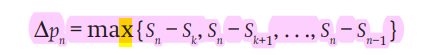

**一直用Sn**-**Sk直到找到最大值**

In [ ]:
from pandas.core.indexes.extension import deprecate_ndim_indexing
import pandas as pd
import numpy as np

#設定一個空的k及delta, 初值皆為NaN
k = np.empty(len(hist))
delta = np.empty(len(hist))

k[:] = np.nan
delta[:] = np.nan

#將Volumn存在volume中
volume = list(hist[["Volume"]].iloc[:, 0])

#================================
#任意設定一個V0值
#================================
V0 = np.mean(volume)

#用迴圈找出每個索引值的k
for i in range(0, len(hist)):
    t=np.nan
    for j in range(i+1):
        if sum(volume[j:i]) < V0:
            t=j 
            break
    k[i]=t 

#找出每個索引值的delta
for i in range(0, len(hist)):
    t=[]
    for j in range(int(k[i]), i):
        t.append(volume[i]-volume[j])
  
    if len(t)==0:
        delta[i] = np.nan
    else:
        delta[i] = max(t)

#印delta變化量
delta

TypeError: ignored

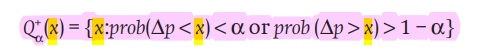

**prob機率要小於**

In [ ]:
#在求信賴區間，左邊是<，右邊是>
#將delta(list)轉成df_delta(DataFrame)
df_delta = pd.DataFrame(delta)

#平均數/標準誤

m = float(df_delta.mean())
se = float(df_delta.std() / len(hist)**0.5)

#推論x值(假設a=0.05)
print(m-1.96*se) #常態分配1.96倍